In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns 

def load_data(filepath):
    df = pd.read_csv(filepath) 
    return df

df = load_data('C:/Users/nejat/AIM Projects/week0 data/togo-dapaong_qc.csv')
print(df.head())


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [2]:
def summary_statistics(df):
    summary_stats = df.describe()
    return summary_stats

summary_stats = summary_statistics(df)
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [3]:
# Check for missing values in GHI, DNI, and DHI
def check_missing_values(df):
    missing_values = df[['GHI', 'DNI', 'DHI']].isnull().sum()
    return missing_values

missing_values = check_missing_values(df)
print(missing_values)

GHI    0
DNI    0
DHI    0
dtype: int64


In [4]:
def handle_negative_values(df):
    df = df[(df['GHI'] >= 0) & (df['DNI'] >= 0) & (df['DHI'] >= 0)]
    return df

print("Negative values in GHI, DNI, DHI:")
print(df)

Negative values in GHI, DNI, DHI:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

     

In [5]:
def check_outliers(df):
    # Check for outliers in GHI, DNI, DHI
    z_scores_1 = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI']]))
    outliers_1 = df[(z_scores_1 > 3).any(axis=1)]
    
    # Check for outliers in ModA, ModB, WS, WSgust
    z_scores_2 = np.abs(stats.zscore(df[['ModA', 'ModB', 'WS', 'WSgust']]))
    outliers_2 = df[(z_scores_2 > 3).any(axis=1)]
    
    return outliers_1, outliers_2

outliers_1, outliers_2 = check_outliers(df)
print("\nPotential outliers in GHI, DNI, and DHI:\n", outliers_1)
print("\nPotential outliers in ModA, ModB, WS, or WSgust:\n", outliers_2)



Potential outliers in GHI, DNI, and DHI:
                Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
7860    2021-10-30 11:01  934.0  989.8   84.9  977.9  951.0  30.2  64.5  3.3   
39532   2021-11-21 10:53  893.0  905.5  138.3  976.6  939.0  34.0  19.1  3.5   
39542   2021-11-21 11:03  904.0  906.1  140.7  986.8  949.0  34.4  18.5  3.9   
39543   2021-11-21 11:04  905.0  907.7  140.9  988.9  951.0  34.4  18.9  2.8   
39544   2021-11-21 11:05  907.0  907.4  142.0  989.9  953.0  34.5  18.3  3.3   
...                  ...    ...    ...    ...    ...    ...   ...   ...  ...   
510473  2022-10-14 11:54  709.5   63.7  629.8  703.1  694.9  30.2  66.6  3.5   
510474  2022-10-14 11:55  677.8   40.6  621.7  670.1  662.2  30.2  66.7  2.8   
510475  2022-10-14 11:56  659.5   29.7  614.9  651.0  643.4  30.3  66.1  4.1   
510476  2022-10-14 11:57  660.1   40.7  605.6  653.2  645.6  30.2  66.0  3.7   
510477  2022-10-14 11:58  655.8   50.2  591.0  647.5  639.9  30.2  66.2  3.4 

In [6]:
def clean_data(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.set_index('Timestamp', inplace=True)
    df_clean = df[['GHI', 'DNI', 'DHI', 'Tamb']].dropna()
    return df_clean

df_clean = clean_data(df)

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

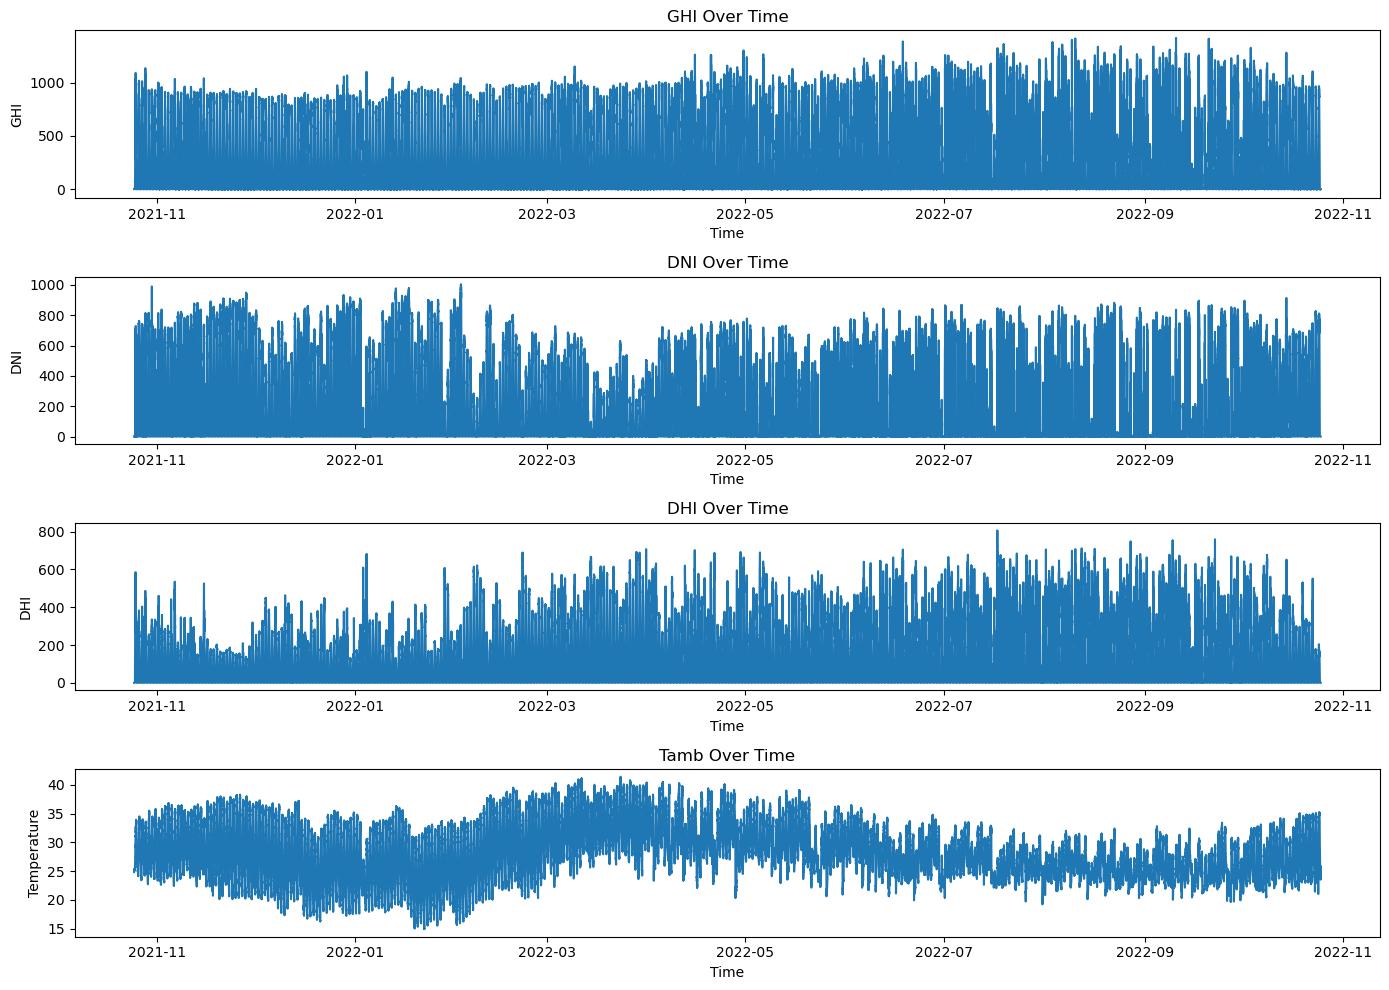

In [7]:
def plot_time_series(df):
    plt.figure(figsize=(14, 10))
    
    # GHI Over Time
    plt.subplot(4, 1, 1)
    sns.lineplot(data=df, x=df.index, y='GHI')
    plt.title('GHI Over Time')
    plt.xlabel('Time')
    plt.ylabel('GHI')

    # DNI Over Time
    plt.subplot(4, 1, 2)
    sns.lineplot(data=df, x=df.index, y='DNI')
    plt.title('DNI Over Time')
    plt.xlabel('Time')
    plt.ylabel('DNI')

    # DHI Over Time
    plt.subplot(4, 1, 3)
    sns.lineplot(data=df, x=df.index, y='DHI')
    plt.title('DHI Over Time')
    plt.xlabel('Time')
    plt.ylabel('DHI')

    # Tamb Over Time
    plt.subplot(4, 1, 4)
    sns.lineplot(data=df, x=df.index, y='Tamb')
    plt.title('Tamb Over Time')
    plt.xlabel('Time')
    plt.ylabel('Temperature')

    plt.tight_layout()
    plt.show()

plot_time_series(df_clean)

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

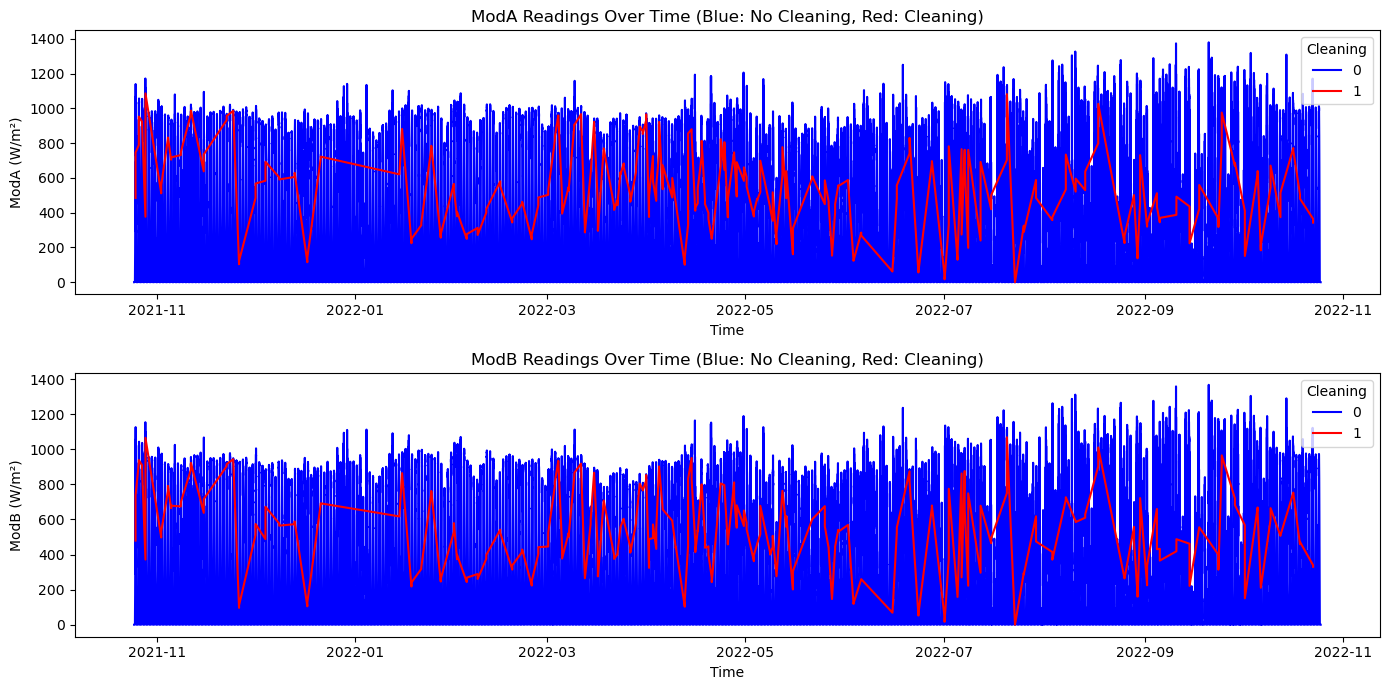

In [8]:
def plot_mod_sensor_readings(df):
    plt.figure(figsize=(14, 7))

    # ModA plot
    plt.subplot(2, 1, 1)
    sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning', palette={0: 'blue', 1: 'red'})
    plt.title('ModA Readings Over Time (Blue: No Cleaning, Red: Cleaning)')
    plt.xlabel('Time')
    plt.ylabel('ModA (W/m²)')

    # ModB plot
    plt.subplot(2, 1, 2)
    sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning', palette={0: 'blue', 1: 'red'})
    plt.title('ModB Readings Over Time (Blue: No Cleaning, Red: Cleaning)')
    plt.xlabel('Time')
    plt.ylabel('ModB (W/m²)')

    plt.tight_layout()
    plt.show()

plot_mod_sensor_readings(df)

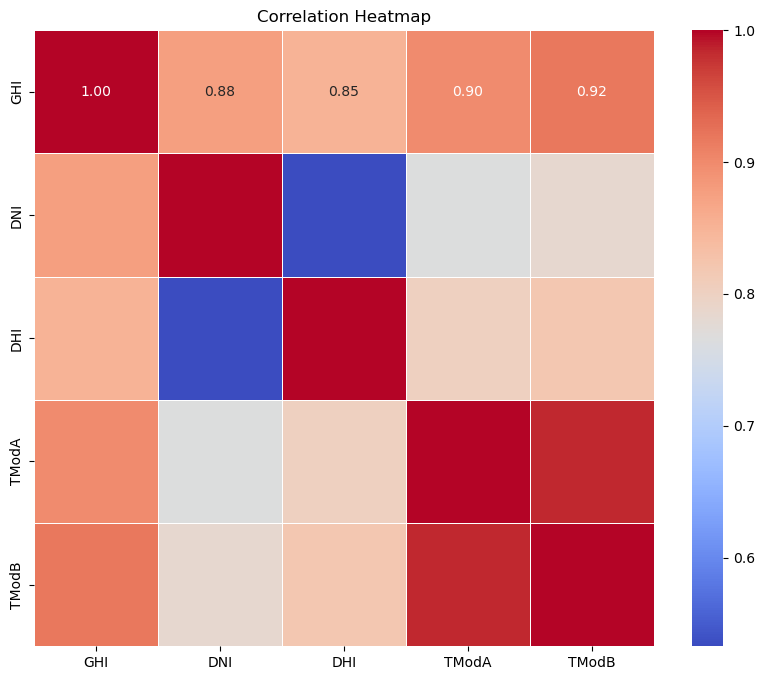

In [9]:
def plot_correlation_heatmap(df):
    correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
    correlation_matrix = df[correlation_columns].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(df)

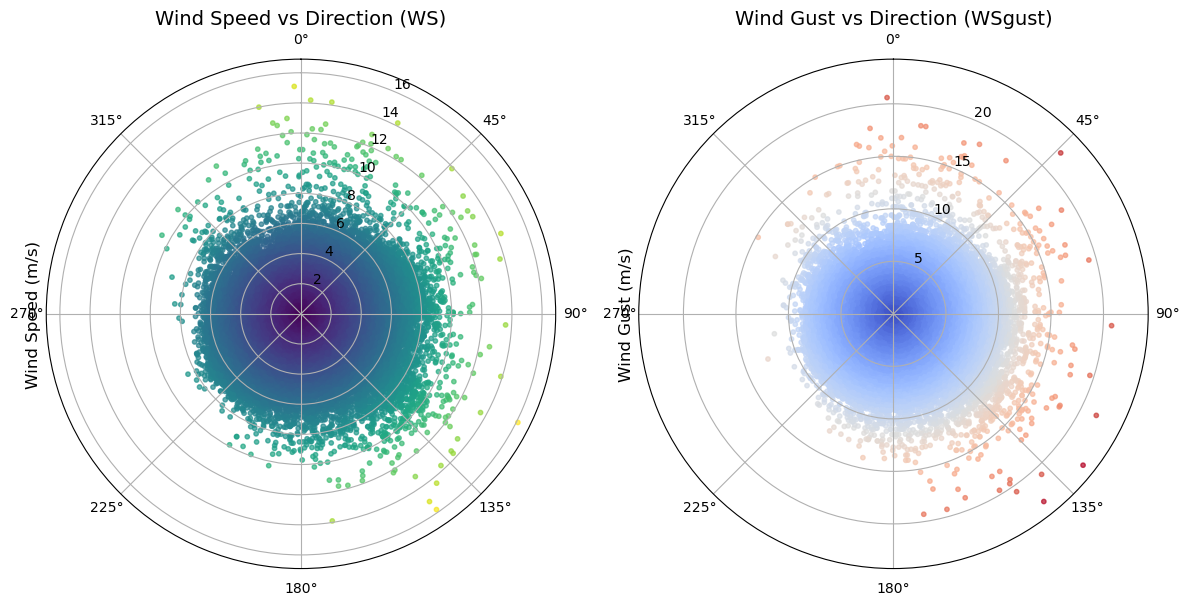

In [10]:
def plot_wind_data(df):
    wind_data = df[['WS', 'WSgust', 'WD']].dropna()
    wind_data['WD_radians'] = np.radians(wind_data['WD'])

    plt.figure(figsize=(12, 6))
    
    # Wind Speed (WS) vs Wind Direction (WD)
    ax1 = plt.subplot(1, 2, 1, projection='polar')
    ax1.scatter(wind_data['WD_radians'], wind_data['WS'], alpha=0.7, s=10, c=wind_data['WS'], cmap='viridis')
    ax1.set_theta_direction(-1)  # Set the direction of theta
    ax1.set_theta_offset(np.pi / 2.0)  # Set the offset for proper orientation (North = 0 degrees)
    ax1.set_title('Wind Speed vs Direction (WS)', fontsize=14)
    ax1.set_ylabel('Wind Speed (m/s)', fontsize=12)

    # Wind Gust Speed (WSgust) vs Wind Direction (WD)
    ax2 = plt.subplot(1, 2, 2, projection='polar')
    ax2.scatter(wind_data['WD_radians'], wind_data['WSgust'], alpha=0.7, s=10, c=wind_data['WSgust'], cmap='coolwarm')
    ax2.set_theta_direction(-1)
    ax2.set_theta_offset(np.pi / 2.0)
    ax2.set_title('Wind Gust vs Direction (WSgust)', fontsize=14)
    ax2.set_ylabel('Wind Gust (m/s)', fontsize=12)

    plt.tight_layout()
    plt.show()

plot_wind_data(df)

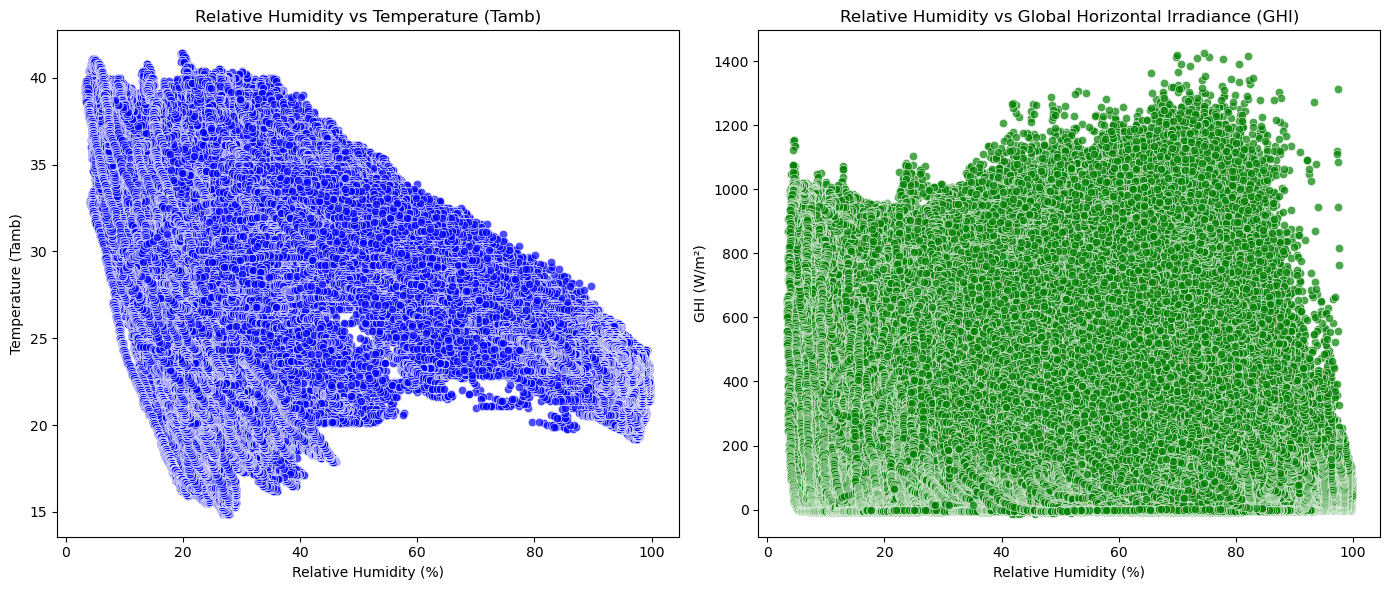

In [11]:
def plot_scatter_plots(df):
    temp_data = df[['RH', 'Tamb', 'GHI']].dropna()

    plt.figure(figsize=(14, 6))

    # Scatter plot: RH vs Temperature
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=temp_data, x='RH', y='Tamb', alpha=0.7, color='blue')
    plt.title('Relative Humidity vs Temperature (Tamb)')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Temperature (Tamb)')

    # Scatter plot: RH vs Solar Radiation (GHI)
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=temp_data, x='RH', y='GHI', alpha=0.7, color='green')
    plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('GHI (W/m²)')

    plt.tight_layout()
    plt.show()

plot_scatter_plots(df)

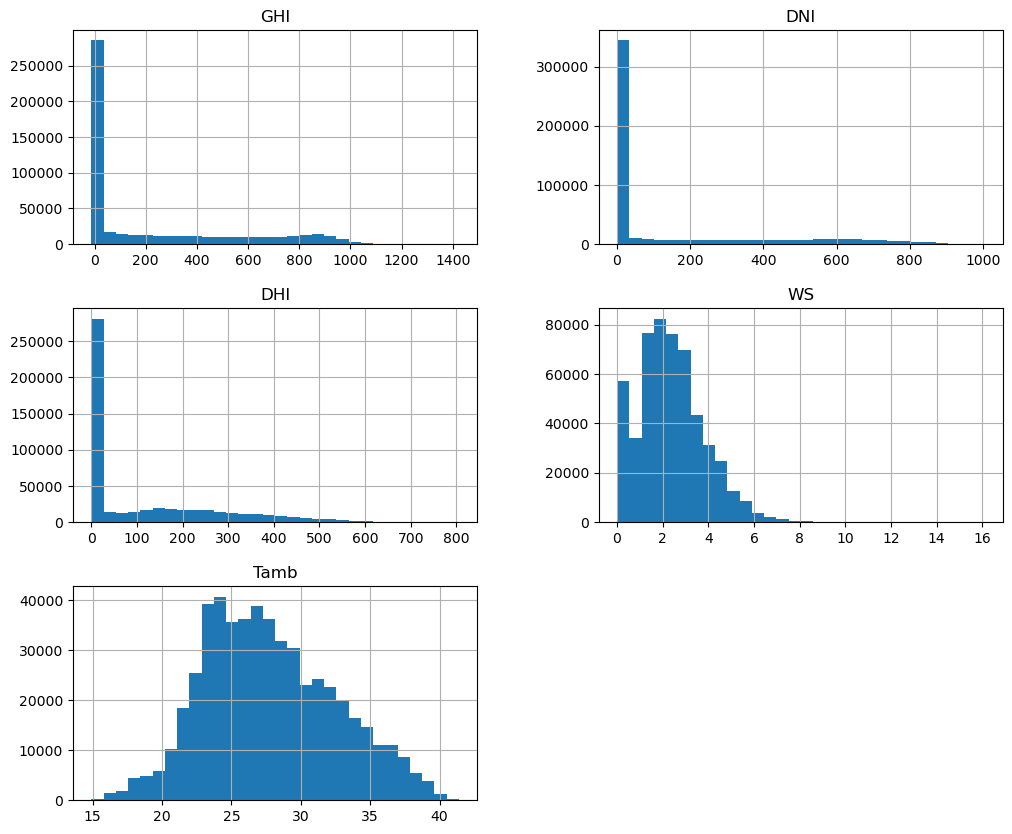

In [12]:
def plot_histograms(df):
    variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
    df[variables].hist(bins=30, figsize=(12, 10))
    plt.show()

plot_histograms(df)

In [13]:
def zscore_outlier_detection(df):
    columns_to_check = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
    z_scores = np.abs(stats.zscore(df[columns_to_check].dropna()))

    outliers = (z_scores > 3).any(axis=1)
    outliers_data = df[outliers]
    return outliers_data

zscore_outlier_detection(df)

GHI   DNI    DHI   ModA   ModB  Tamb    RH   WS  \
Timestamp                                                                
2021-10-28 18:12:00   -1.0   0.0    0.0    0.0    0.0  29.3  62.4  6.9   
2021-10-28 18:14:00   -0.8   0.0    0.0    0.0    0.0  28.6  63.7  7.1   
2021-10-28 18:26:00   -1.3   0.0    0.0    0.0    0.0  27.3  65.0  6.9   
2021-10-28 18:30:00   -1.3   0.0    0.0    0.0    0.0  27.1  65.2  6.9   
2021-10-28 18:33:00   -1.4   0.0    0.0    0.0    0.0  26.9  65.6  6.9   
...                    ...   ...    ...    ...    ...   ...   ...  ...   
2022-10-14 11:54:00  709.5  63.7  629.8  703.1  694.9  30.2  66.6  3.5   
2022-10-14 11:55:00  677.8  40.6  621.7  670.1  662.2  30.2  66.7  2.8   
2022-10-14 11:56:00  659.5  29.7  614.9  651.0  643.4  30.3  66.1  4.1   
2022-10-14 11:57:00  660.1  40.7  605.6  653.2  645.6  30.2  66.0  3.7   
2022-10-14 11:58:00  655.8  50.2  591.0  647.5  639.9  30.2  66.2  3.4   

                     WSgust  WSstdev     WD  WDstdev   BP  Cleaning  \
Timestamp                                                             
2021-10-28 18:12:00     8.9      1.2  128.7     10.8  976         0   
2021-10-28 18:14:00     8.9      1.1  127.9     14.4  976         0   
2021-10-28 18:26:00    10.0      1.6  131.2     13.1  976         0   
2021-10-28 18:30:00     8.7      1.0  126.7     11.1  976         0   
2021-10-28 18:33:00     8.4      0.9  122.5     13.2  976         0   
...                     ...      ...    ...      ...  ...       ...   
2022-10-14 11:54:00     4.4      0.8  167.0     15.2  977         0   
2022-10-14 11:55:00     3.6      0.6  175.1     19.7  977         0   
2022-10-14 11:56:00     4.9      0.5  174.0     11.5  977         0   
2022-10-14 11:57:00     4.6      0.7  165.4     21.6  977         0   
2022-10-14 11:58:00     5.9      1.6  179.5     25.8  977         0   

                     Precipitation  TModA  TModB  Comments  
Timestamp                                                   
2021-10-28 18:12:00            0.0   29.9   29.5       NaN  
2021-10-28 18:14:00            0.0   29.5   29.2       NaN  
2021-10-28 18:26:00            0.0   28.0   27.7       NaN  
2021-10-28 18:30:00            0.0   27.8   27.5       NaN  
2021-10-28 18:33:00            0.0   27.4   27.0       NaN  
...                            ...    ...    ...       ...  
2022-10-14 11:54:00            0.0   46.8   51.6       NaN  
2022-10-14 11:55:00            0.0   46.8   51.6       NaN  
2022-10-14 11:56:00            0.0   46.8   51.6       NaN  
2022-10-14 11:57:00            0.0   46.6   51.4       NaN  
2022-10-14 11:58:00            0.0   46.5   51.3       NaN  

[8185 rows x 18 columns]

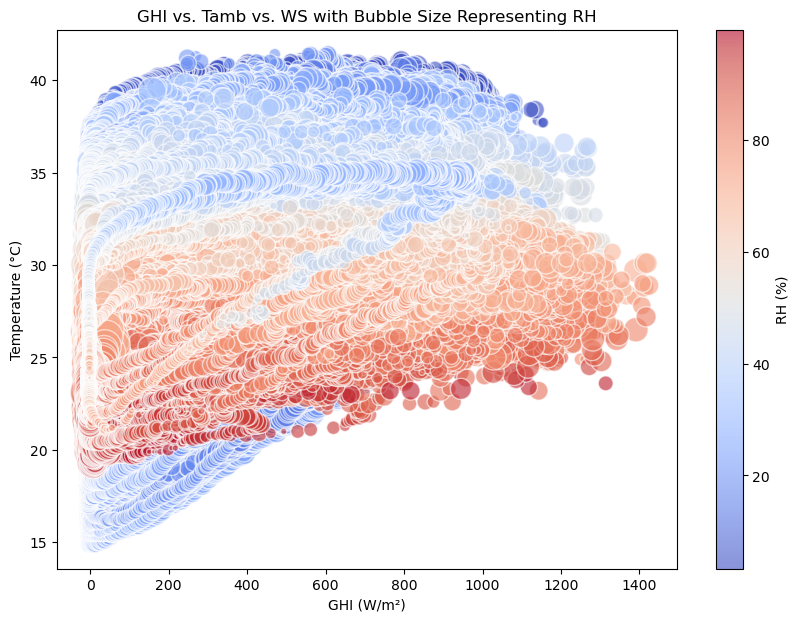

In [14]:
def plot_bubble_chart(df):
    plt.figure(figsize=(10, 7))

    bubble_size = df['WS'] * 50 
    plt.scatter(df['GHI'], df['Tamb'], s=bubble_size, c=df['RH'], cmap='coolwarm', alpha=0.6, edgecolor='w')

    plt.title('GHI vs. Tamb vs. WS with Bubble Size Representing RH')
    plt.xlabel('GHI (W/m²)')
    plt.ylabel('Temperature (°C)')
    plt.colorbar(label='RH (%)')
    plt.show()

plot_bubble_chart(df)

In [15]:
def drop_null_columns(df):
    """Drop columns that are completely null."""
    df_clean = df.copy()
    df_clean = df_clean.dropna(axis=1, how='all')
    dropped_columns = set(df.columns) - set(df_clean.columns)
    print("Dropped columns (completely null):", dropped_columns)
    return df_clean

def fill_missing_values(df):
    """Fill missing values with the mean of each column."""
    df_clean = df.copy()
    df_clean = df_clean.fillna(df_clean.mean())
    missing_values_after_fill = df_clean.isnull().sum()
    print("Remaining missing values after filling with mean:\n", missing_values_after_fill)
    return df_clean

def handle_negative_values(df):
    """Handle negative values by replacing them with NaN."""
    df_clean = df.copy()
    df_clean.loc[df_clean['GHI'] < 0, 'GHI'] = pd.NA
    negative_ghi = df_clean['GHI'][df_clean['GHI'] < 0].count()
    nan_in_ghi = df_clean['GHI'].isna().sum()
    print(f"Negative GHI values after cleaning: {negative_ghi}")
    print(f"NaN values in GHI after replacing negative values: {nan_in_ghi}")
    return df_clean

def clean_data(df):
    df_clean = drop_null_columns(df)
    df_clean = fill_missing_values(df_clean)
    df_clean = handle_negative_values(df_clean)
    return df_clean

df_clean = clean_data(df)


Dropped columns (completely null): {'Comments'}
Remaining missing values after filling with mean:
 GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64
Negative GHI values after cleaning: 0
NaN values in GHI after replacing negative values: 257385
